# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
#reading the data and storing in another dataset
df_=pd.read_csv("suv_data.csv")
df_.shape
df=df_

# Visualizing

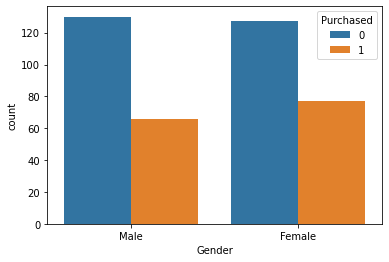

In [3]:
sns.countplot(x="Gender",hue="Purchased",data=df)

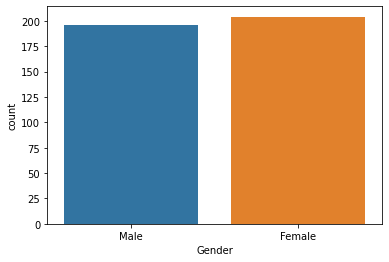

In [4]:
sns.countplot(x="Gender",data=df)

In [5]:
#creating dummy variables for gender
gender=pd.get_dummies(df["Gender"],drop_first=True)

In [6]:
#concating gender int the main dataframe 
df=pd.concat([df,gender],axis=1)

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [8]:
#Removing duplicated columns(if any)
df = df.loc[:,~df.columns.duplicated()]
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [9]:
#dropping the gender column
df.drop(["Gender"],axis=1,inplace=True)

In [10]:
#dropping the User Id column
df.drop(["User ID"],axis=1,inplace=True)

In [11]:
df

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


### Defining the input and output variables

In [12]:
X= df.drop(["Purchased"],axis=1)
Y=np.asarray(df["Purchased"])

In [13]:
#Standardizing the input variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X=scaler.fit_transform(X)
X_train, X_test,Y_train, Y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=6)

In [14]:
#spot check algorithms to select the algorithm with the best accuracy
seed=6
scoring='accuracy'
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

#evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results=model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" %  (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840625 (0.040625)
LDA: 0.843750 (0.039528)
LDA: 0.843750 (0.039528)
KNN: 0.890625 (0.046875)
CART: 0.853125 (0.062578)
NB: 0.890625 (0.058044)
SVM: 0.903125 (0.045178)


# Using SVM because it resulted in highest accuracy

In [15]:
from sklearn import svm
clf=svm.SVC(kernel='rbf',random_state=0)
clf.fit(X_train, Y_train)
Y_pred=clf.predict(X_test)

In [16]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.90      0.93      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



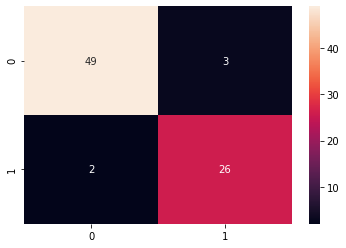

In [17]:
cnf=confusion_matrix(Y_test,Y_pred)
sns.heatmap(cnf,annot=True)